In [5]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt
import pylab

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

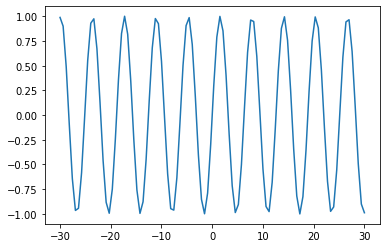

In [10]:
# бесконечное количество экстремумов
y = lambda x: np.sin(x)
fig = plt.subplots()
x = np.linspace(-30, 30,100)
plt.plot(x, y(x))

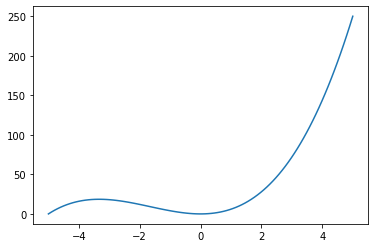

In [63]:
# два экстремума
y = lambda x: 5*(x**2)+x**3
fig = plt.subplots()
x = np.linspace(-5, 5,100)
plt.plot(x, y(x))

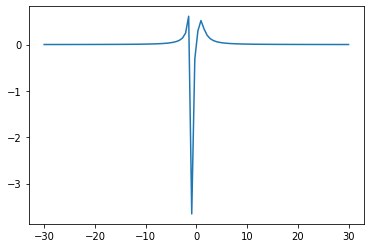

In [35]:
# три экстремума
y = lambda x: x/(1+x**3)
fig = plt.subplots()
x = np.linspace(-30, 30,100)
plt.plot(x, y(x))

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [67]:
# считаем производную по X при фиксированном Y
from scipy.misc import derivative
def f(x):
    return 16*x**2 + 1/x + 4*x + 7

a = derivative(f, 1.0, dx=1e-6)

# считаем производную по Y при фиксированном X
from scipy.misc import derivative
def f(y):
    return 2*y**3 + y**2 + 8

b = derivative(f, 2.0, dx=1e-6)

print (a, b)

35.00000000045134 28.00000000036107


### Задание 4:

Градиентный спуск своими руками

In [144]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [211]:
x = np.array([100, 200])
lr = 0.1

x1 = f(x)
for i in range(100):
    # Calculate gradient
    a = 2*x[0]
    b = 2*x[1]
    grad = np.array([a, b])# Your code here (функция для вычисления градиента есть в лекционном ноутбуке)
    x2 = f(x)
    if x2 <= x1:
        x1 = f(x)
        x = x - lr*grad    
    else:
        # думаю, тут можно задать нужную степень точности, чтобы цикл не бегал 100 раз, если разниуа между соседними
        #значениями минимальна
        break

In [212]:
# по сути, функция минимальна в точке [0,0], но итерациями получаются просто сверхмалые числа
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [2.03703598e-08 4.07407195e-08]
Значение функции в минимуме:  2.0747577844404994e-15


Проверка с помощью встроенной функции numpy: 

In [214]:
#градиент между соседними значениями равен нулю, что говорит о том, что найден локальный экстремум.
j = np.gradient([x1, x2])
print(j)

[0. 0.]


In [94]:
# проверяем ещё с помощью встроенной в scipy функции minimize, получаем что минимум равен нулю (тоже с допуском, так как
# алгоритм дискретный)
from scipy.optimize import minimize
res = minimize(f, x, method='nelder-mead', options={'xtol': 0.1, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 42
         Function evaluations: 80
